The following analysis intends to establish a quantitative relationship between the pressure measured by the Span pressure gauge on the Parr reactor and the actual pressure. See p. 158 in Andy Ylitalo's lab notebook, December 5th, 2018.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# save parameters
savePlot = True
saveFolder = '..\\FIGURES\\'
saveName = 'calibrate_span_pressure_gauge'
ext = '.pdf'
# plot parameters
# font sizes
lFS = 14 # legend
axFS = 18 # axis labels
tFS = 20 # title
tkFS = 14 # tick labels
# plot sizes
LW = 2 # line width
MS = 8 # marker size

The following data are recorded on Dec. 5, 2018 on p. 158 of Andy Ylitalo's lab notebook (1).

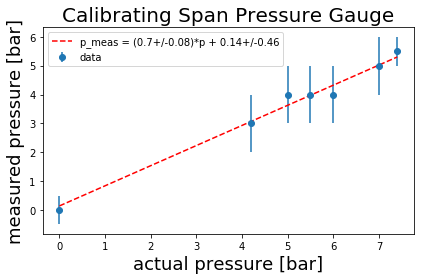

In [2]:
# regulator (actual) pressure [bar]
p = np.array([6,7,7.4,4.2,5,5.5,0])
# measured pressure with Span gauge [bar]
p_meas = np.array([4,5,5.5,3,4,4,0])
# uncertainties in pressure measurements [bar]
sigma_p = np.array([1,1,0.5,1,1,1,0.5])

# Linear regression
coeff, cov =  np.polyfit(p, p_meas, 1, w=sigma_p, cov=True)
a, b = coeff
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])

# Plot
plt.figure()
plt.errorbar(p, p_meas, yerr=sigma_p, label='data', fmt='o')
# linear distribution of pressures
p_fit = np.linspace(np.min(p), np.max(p), 20)
p_meas_fit =  a*p_fit + b
plt.plot(p_fit,p_meas_fit, 'r--', label='p_meas = (' + str(round(a,2)) +\
         '+/-' + str(round(sigma_a,2)) + ')*p + ' + str(round(b,2)) + '+/-' + str(round(sigma_b,2)))

# format plot
plt.legend(loc='best')    
plt.xlabel('actual pressure [bar]', fontsize=axFS)
plt.ylabel('measured pressure [bar]', fontsize=axFS)
plt.title('Calibrating Span Pressure Gauge', fontsize=tFS)

# save figure
plt.tight_layout()
plt.savefig(saveFolder + saveName + ext)

In practice, a conversion from the measured pressure to the actual pressure is more useful.

In [3]:
# conversion factor from p_meas -> p is the reciprocal of the
# conversion factor from p -> p_meas, which we found to be "a"
conv = 1/a
# calculate uncertainty in conversion factor from p_meas -> p
sigma_conv = sigma_a/a**2

print('p = (' + str(conv) + '+/- ' +str(sigma_conv) + ')*p_meas')

p = (1.434677521943773+/- 0.1708892387700649)*p_meas
